## Analysis of the MetOcean Stokes drift data collected on the BBG rooftop

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib.lines import Line2D
with open('waddendrifters_roof.json') as f:
    data = json.load(f)

In [ ]:

def find_static_coords(datadict, time_buffer=50, name_fig=None, output_path=None, palette=None, output_format='svg'):

    def degrees_to_meters(deg_lat, deg_lon, reference_lat, Re=6371e3):
        """Convert degrees to meters using haversine approximation."""
        lat_meters = (np.pi / 180) * Re * deg_lat
        lon_meters = (np.pi / 180) * Re * np.cos(np.radians(reference_lat)) * deg_lon
        return lat_meters, lon_meters

    if palette is None:
        #cmap = plt.get_cmap("viridis")  # or "plasma", "cividis", "turbo"
        #bright_palette = [cmap(i) for i in np.linspace(0, 1, len(datadict.keys()))]
        bright_palette=sns.color_palette("tab20", 30)
        

        # Extend the original palette by appending the new colors
        palette_array = bright_palette 
        palette={drifter: palette_array[idx] for idx, drifter in enumerate(datadict.keys())}

    fig1 = plt.figure(figsize=(10, 6))
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('Latitude deviation [m]', size=14)
    ax1.set_ylabel('KDE',size=14)
    ax1.tick_params(axis='both', labelsize=14)

    fig2 = plt.figure(figsize=(10, 6))
    ax2 = fig2.add_subplot(111)
    ax2.set_xlabel('Longitude deviation [m]', size=14)
    ax2.set_ylabel('KDE',size=14)
    ax2.tick_params(axis='both', labelsize=14)
    lons_dev=[]
    lats_dev=[]

    for i, key in enumerate(datadict.keys()):
        ds=datadict[key]
        lat = np.array([row[1] for row in ds])
        lon= np.array([row[2] for row in ds])
        
        deviations_lat, deviations_lon= degrees_to_meters(lat, lon, np.mean(lat))

        latitude_std=deviations_lat.std()
        longitude_std=deviations_lon.std()


        sns.kdeplot(deviations_lat - np.mean(deviations_lat), color=palette[key], ax=ax1, fill=False, alpha=1, common_norm=False, )
        sns.kdeplot(deviations_lon - np.mean(deviations_lon), color=palette[key], ax=ax2, fill=False, alpha=1, common_norm=False,)
        lons_dev.append(longitude_std)
        lats_dev.append(latitude_std)


    ax1.set_xlim([-50, 50])
    ax2.set_xlim([-50, 50])
    print(f"Mean latitude deviation: {np.mean(lats_dev):.2f} m, median: {np.median(lats_dev):.2f} m")
    print(f"Mean longitude deviation: {np.mean(lons_dev):.2f} m, median: {np.median(lons_dev):.2f} m")

    # Example for ax1
    mean_lat = np.mean(lats_dev)
    ax1.text(
        0.95, 0.95,  # coordinates in axes fraction (x=95%, y=95%)
        rf"$\langle \sigma \rangle$: {mean_lat:.2f} $\mathrm{{m}}$",
        ha='right', va='top', fontsize=14, transform=ax1.transAxes,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5)
    )

    # Example for ax2
    mean_lon = np.mean(lons_dev)
    ax2.text(
        0.95, 0.95,
        rf"$\langle \sigma \rangle$: {mean_lon:.2f} $\mathrm{{m}}$",
        ha='right', va='top', fontsize=14, transform=ax2.transAxes,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5)
    )


    if output_path is not None:
        output_path_lon= f'{output_path}{name_fig}_lon.{output_format}'
        output_path_lat= f'{output_path}{name_fig}_lat.{output_format}'
        fig1.savefig(output_path_lat, dpi=300)
        fig2.savefig(output_path_lon, dpi=300)


    plt.show()

    

Mean latitude deviation: 8.23 m, median: 6.42 m
Mean longitude deviation: 6.73 m, median: 5.58 m


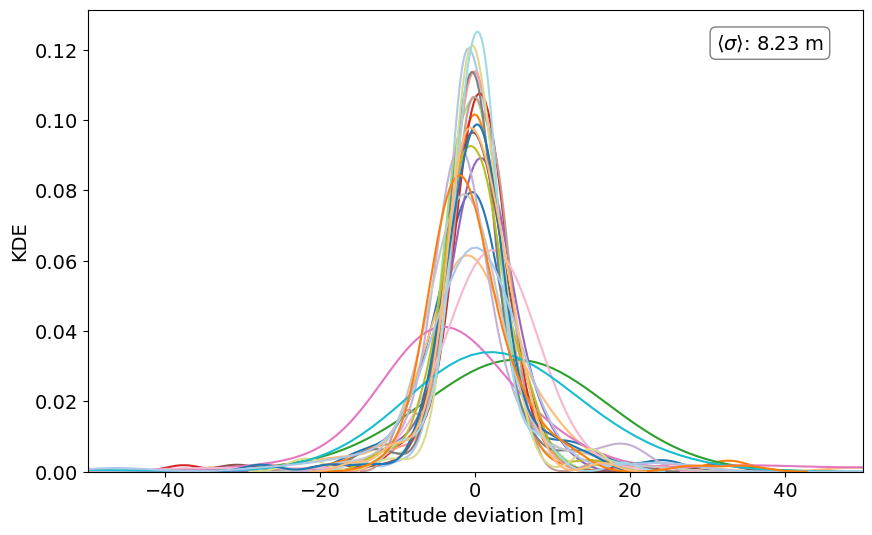

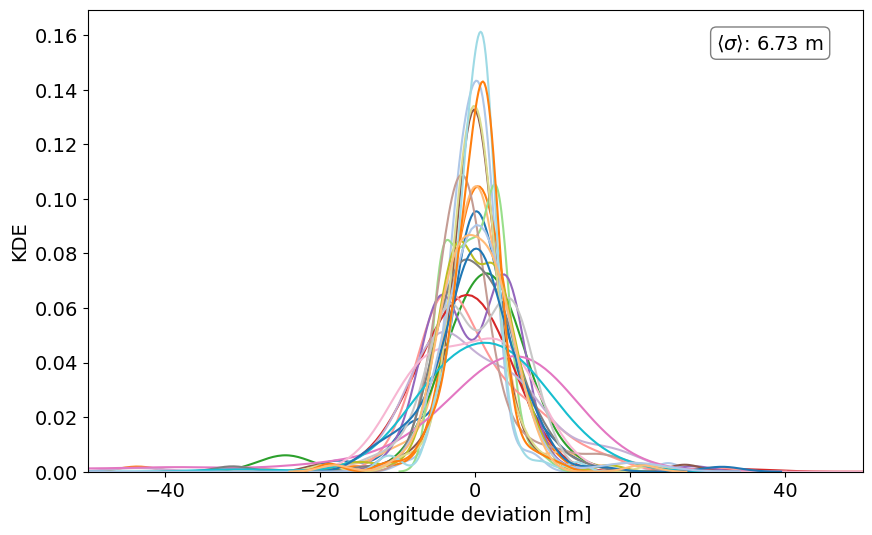

In [ ]:
find_static_coords(data, time_buffer=50, name_fig='roof_drifters_analysis', output_format='pdf' )